In [1]:
from src.preprocessing import data_loader
from src.normalizers import normalizers
from src.evaluation import cross_validation
from src.models import get_models
from src.visualization import plot_results


In [ ]:
# Select, load and preprocess the dataset
loader=data_loader()
dataset=loader.chose_dataset()
# df = loader.load()     -------- load the dataset after selecting from dropdown
X, Y = loader.split_features_target()


Dropdown(description='Dataset:', options=('data/jm1.csv', 'data/mc1.csv', 'data/pc3.csv'), value='data/jm1.csv…

Number of rows with NaN values:  5
Class Distribution {False: 8777, True: 2103}
Class Distribution % {False: 80.67, True: 19.33}


In [ ]:
# Get all models
models = get_models()
# models       ------------ check the available models

In [ ]:
# Initialize dictionaries to hold results
accuracy = {}
g_mean = {}
f1_score = {}
fitting_time = {}
i=1

# Iterate through models and normalization techniques
for model_name, model in models.items():
    print(f"Trainig model {i}/{len(models.keys())}: {model_name}")
    normalizer = normalizers(model)
    for k, v in normalizer.get_all().items():
        acc, gm, f1, f_time = cross_validation(v, X, Y)
        if k not in accuracy:
            accuracy[k] = []
            g_mean[k] = []
            f1_score[k] = []
            fitting_time[k] = []
        accuracy[k].append(acc)
        g_mean[k].append(gm)
        f1_score[k].append(f1)
        fitting_time[k].append(f_time)
    i+=1

Trainig model 1/7: Logistic Regression
Trainig model 2/7: Perceptron
Trainig model 3/7: LinearSVC
Trainig model 4/7: SVC_rbf
Trainig model 5/7: Decision Tree
Trainig model 6/7: Random Forest
Trainig model 7/7: Neural Network


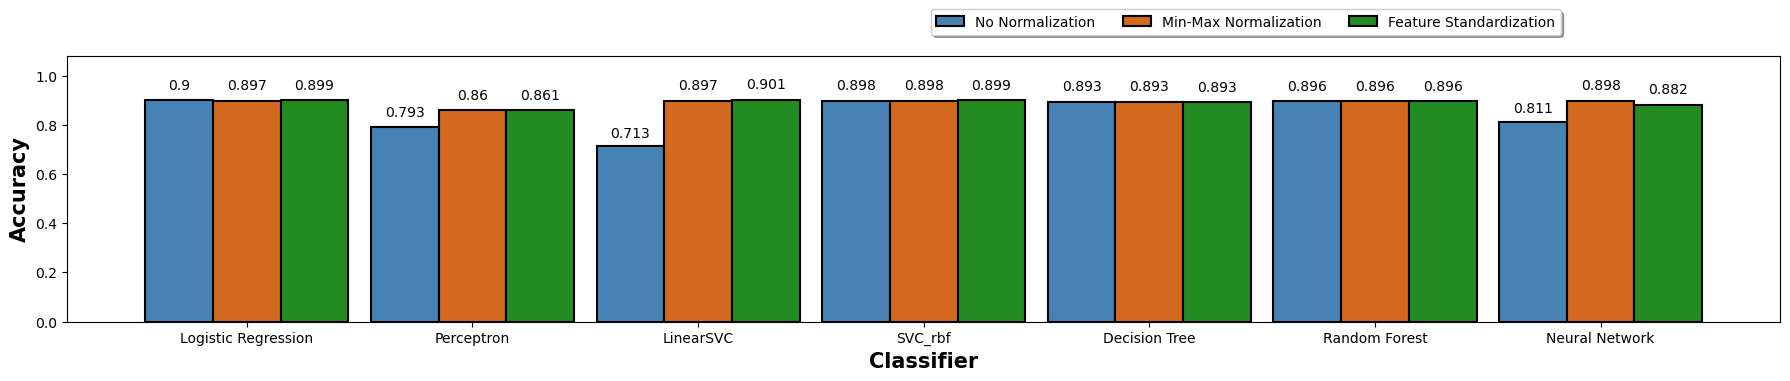

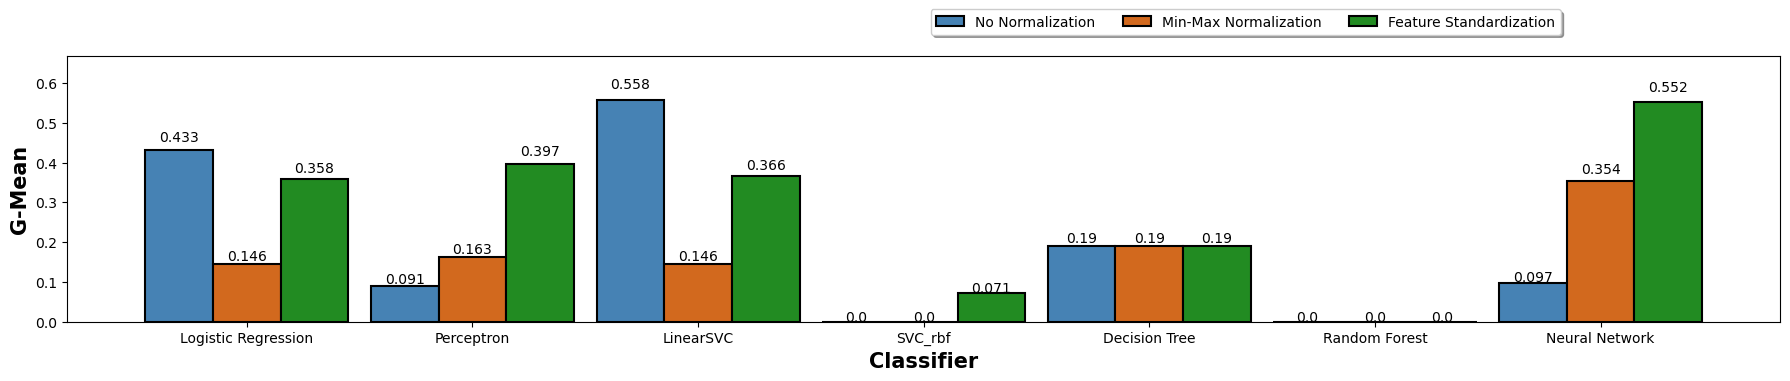

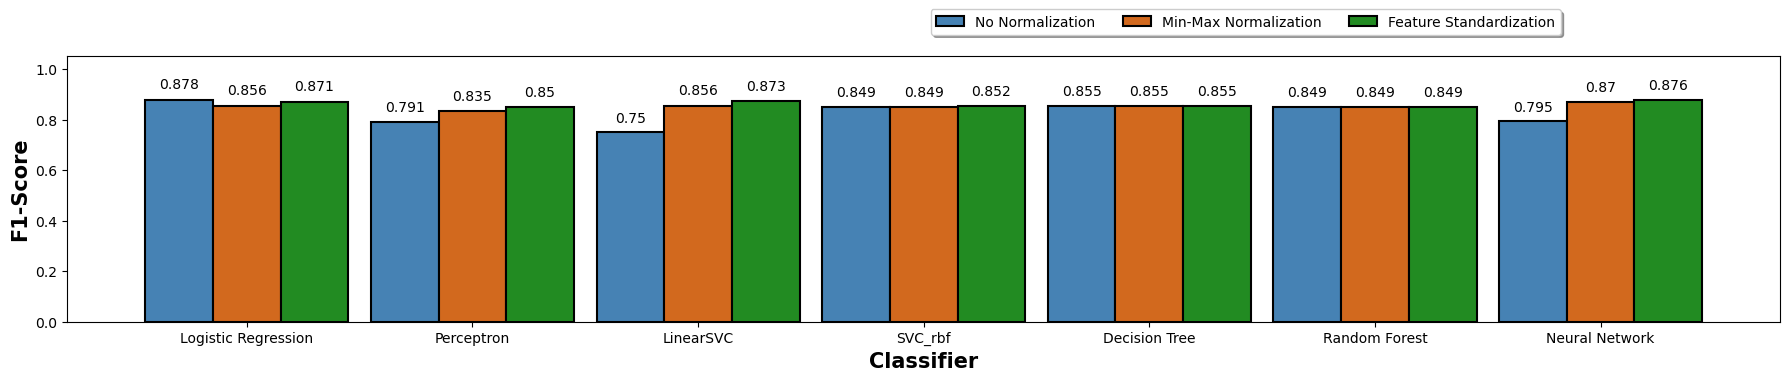

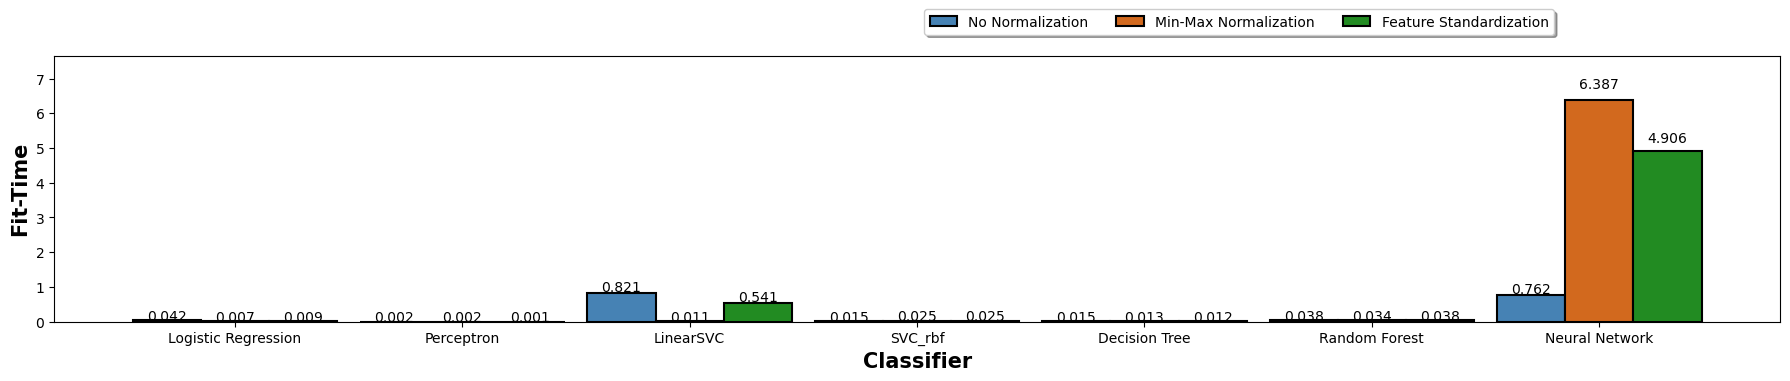

In [ ]:
# Store results
scorers = {
    'Accuracy': accuracy,
    'G-Mean': g_mean,
    'F1-Score': f1_score,
    'Fit-Time': fitting_time
}
# Plot results
for k, v in scorers.items():
    plot_results(v, k, models, dataset).bar()